Use iris flower dataset to create classification model. Your task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. Create the classification model using k-nn classifier and evaluate the performance of your classifier. Find the best value of ‘k’ for iris dataset.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as m

In [45]:
iris_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Iris.csv',header=None)
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
feature_df=iris_df.iloc[:,0:4].values
target_df=iris_df.iloc[:,4].values

In [47]:
le=LabelEncoder()
target_df=le.fit_transform(target_df)
target_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(feature_df,target_df,test_size=0.4,random_state=10)

In [73]:
neighbors=np.arange(1,11)
train_accuracy=np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

In [74]:
for i,k in enumerate(neighbors):
    iris_knn=KNeighborsClassifier(n_neighbors=k)
    iris_knn.fit(X_train,Y_train)

    train_accuracy[i]=iris_knn.score(X_train,Y_train)
    test_accuracy[i]=iris_knn.score(X_test,Y_test)

In [75]:
train_accuracy

array([1.        , 0.96666667, 0.97777778, 0.97777778, 0.96666667,
       0.95555556, 0.96666667, 0.95555556, 0.96666667, 0.96666667])

In [76]:
test_accuracy

array([0.91666667, 0.93333333, 0.93333333, 0.96666667, 0.95      ,
       0.98333333, 0.96666667, 0.96666667, 0.96666667, 0.96666667])

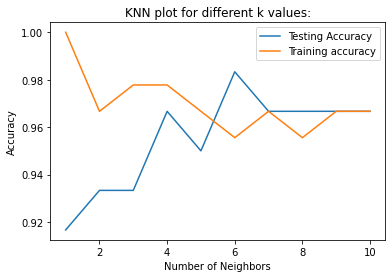

In [77]:
plt.title('KNN plot for different k values:')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [82]:
model1=KNeighborsClassifier(n_neighbors=6)
model1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [83]:
y_pred1=model1.predict(X_test)

In [84]:
print(m.accuracy_score(y_test,y_pred1)*100)

98.33333333333333


In [85]:
model2=KNeighborsClassifier(n_neighbors=7)
model2.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [86]:
y_pred2=model2.predict(X_test)

In [87]:
print(m.accuracy_score(y_test,y_pred2)*100)

96.66666666666667


Best value of k for iris dataset turns out to be 6